**A dataset about dogs.**

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

**Do your importing and your setup**

In [1]:
import pandas as pd
%matplotlib inline

**Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows**

In [212]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values=["Unknown", "UNKNOWN", "unknown", "-999", "???"])
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


**How many rows do you have in the data? What are the column types?**

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [213]:
df.shape

(81937, 15)

In [214]:
new_df = df[:30000]
new_df.shape

(30000, 15)

In [215]:
new_df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

**Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.**

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [216]:
# Each row in the dataset is a profile of each dog in New York.
# Animal Name is a string with name of the dog.
# Animal birth is a number value with the date of birth of the dog.

**Your thoughts**

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [217]:
# How many dogs are being vaccinated?
# How many dogs were born in 2005?
# How many dog licenses are going to expire within a year?
# What's the most popular dog color?

**Looking at some dogs**

**What are the most popular (primary) breeds of dogs? Graph the top 10.**

In [218]:
#new_df.groupby("Primary Breed")['Primary Breed'].value_counts().head(10)
primary_breeds = new_df['Primary Breed'].value_counts().head(10)
primary_breeds

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

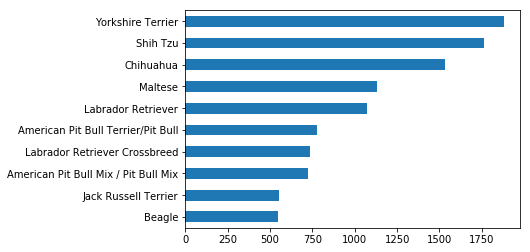

In [219]:
primary_breeds.sort_values(ascending=True).plot(kind='barh')

**"Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown**

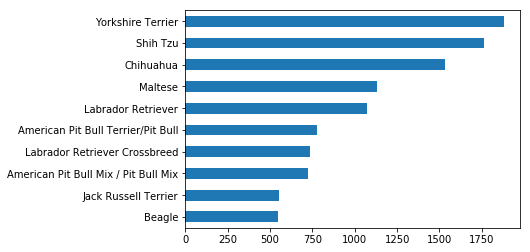

In [220]:
breed_unknown = new_df[new_df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().head(10)

breed_unknown.sort_values(ascending = True).plot(kind='barh')

**What are the most popular dog names?**

In [221]:
new_df['Animal Name'].value_counts().head()

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Name: Animal Name, dtype: int64

**Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?**

In [222]:
new_df[new_df["Animal Name"] == 'Max']["Animal Name"].value_counts()

Max    202
Name: Animal Name, dtype: int64

In [223]:
new_df[new_df["Animal Name"] == 'Maxwell']["Animal Name"].value_counts()

Maxwell    11
Name: Animal Name, dtype: int64

**What percentage of dogs are guard dogs?**

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [224]:
new_df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

In [225]:
new_df[new_df['Guard or Trained'] == 'No']['Guard or Trained'].value_counts()/len(new_df)*100

No    66.03
Name: Guard or Trained, dtype: float64

**What are the actual numbers?**

In [226]:
new_df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

**Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????**

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [227]:
new_df['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

In [278]:
new_df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

**Fill in all of those empty "Guard or Trained" columns with "No"**

Then check your result with another `.value_counts()`

In [229]:
new_df['Guard or Trained'].fillna("No").value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

**What are the top dog breeds for guard dogs?**

In [230]:
new_df_guard = new_df[new_df['Guard or Trained'] == 'Yes']
new_df_guard_unknown = new_df_guard[new_df_guard['Primary Breed'] != 'Unknown']
new_df_guard_unknown.groupby('Primary Breed')["Guard or Trained"].value_counts().sort_values(ascending=False)#.head(5)

Primary Breed               Guard or Trained
German Shepherd Dog         Yes                 3
Yorkshire Terrier           Yes                 1
Shih Tzu                    Yes                 1
Schnauzer, Miniature        Yes                 1
Rottweiler                  Yes                 1
Poodle, Standard            Yes                 1
Labrador Retriever          Yes                 1
Golden Retriever            Yes                 1
German Shepherd Crossbreed  Yes                 1
Doberman Pinscher           Yes                 1
Name: Guard or Trained, dtype: int64

**Create a new column called "year" that is the dog's year of birth**

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [231]:
new_df["year"] = new_df['Animal Birth'].apply(lambda birth: birth.year)
new_df["year"].head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    2007
1    2013
2    2014
3    2008
4    2014
Name: year, dtype: int64

**Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?**

In [232]:
#import date
from datetime import date

In [233]:
now = datetime.datetime.now()
print(now.year)

2017


In [234]:
new_df['age'] = now.year-new_df['year']
new_df['age'].head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    10
1     4
2     3
3     9
4     3
Name: age, dtype: int64

In [235]:
new_df['age'].mean()

7.7124333333333333

**Joining data together**

In [255]:
neighborhoods = pd.read_csv('zipcodes-neighborhoods.csv', na_values=["NaN", "Unknown", "UNKNOWN", "unknown", "-999", "???"])
new_frames = new_df.merge(neighborhoods, left_on="Owner Zip Code", right_on="zip")

**Which neighborhood does each dog live in?**

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [309]:
new_frames['Animal Dominant Color'].unique()

array(['BROWN', 'Black', 'BLUE MERLE', 'BLACK', 'BRINDLE', 'GOLD', 'Red',
       'White', 'FAWN', 'Brown', 'Gray', 'Rust', 'Silver', 'Tan', 'GRAY',
       'Chocolate', 'Blond', 'CHOCOLATE', 'WHITE', 'TAN', 'BLOND',
       'APRICOT', 'BLUE', 'Fawn', 'CHARCOAL', 'Apricot', 'RED', 'RUST',
       'Brindle', 'SILVER', 'CREAM', 'Blue', 'ORANGE', 'Cream', 'Gold',
       'Orange', 'Charcoal', nan, 'Blue Merle', 'Sable', 'Red Sesame'], dtype=object)

In [307]:
new_frames.head(20)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,monochrome
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan,False
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,...,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan,True
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan,False
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan,True
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan,False
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,...,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan,False
6,10024,Peyton,M,NaN,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,...,Yes,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan,False
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,...,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan,False
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,...,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan,True
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,...,Yes,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan,False


**What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?**

In [257]:
new_frames[new_frames['borough'] == 'Bronx']['Animal Name'].value_counts().head()

Bella       22
Max         21
Rocky       20
Princess    15
Lucky       15
Name: Animal Name, dtype: int64

In [258]:
new_frames[new_frames['borough'] == 'Brooklyn']['Animal Name'].value_counts().head()

# bronx = new_frames[new_frames['borough'] == 'Bronx']
# bronx.head()
# new_df[new_df['Guard or Trained'] == 'Yes']

Max        46
Bella      45
Charlie    42
Rocky      36
Lucy       32
Name: Animal Name, dtype: int64

**What is the most common dog breed in each of the neighborhoods of NYC?**

In [263]:
# new_frames[["neighborhood", "Primary Breed"]].groupby("neighborhood").describe().head()

In [265]:
new_frames.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(3)

neighborhood               Primary Breed                     
Borough Park               Yorkshire Terrier                      49
                           Maltese                                34
                           Shih Tzu                               34
Bronx Park and Fordham     Yorkshire Terrier                      39
                           Shih Tzu                               33
                           Chihuahua                              30
Bushwick and Williamsburg  Yorkshire Terrier                      47
                           Chihuahua                              40
                           Shih Tzu                               40
Canarsie and Flatlands     Shih Tzu                               56
                           Yorkshire Terrier                      48
                           Maltese                                28
Central Bronx              Yorkshire Terrier                      29
                           Shih Tzu      

**What breed of dogs are the least likely to be spayed? Male or female?**

In [286]:
# Soma said we should not do this number. Instead he provided this code.

new_frames.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).reset_index(name='rate').pivot(index='Primary Breed', values='rate', columns='Spayed or Neut').sort_values(by='No', ascending=False)



Spayed or Neut,No,Yes
Primary Breed,,
French Spaniel,1.000000,NaN
Canaan Dog,1.000000,NaN
"Mastiff, Tibetan",1.000000,NaN
Kooikerhondje,1.000000,NaN
Mudi,1.000000,NaN
Karelian Bear Dog,1.000000,NaN
Polish Hound,1.000000,NaN
"Mastiff, French (Dogue de Bordeaux)",1.000000,NaN
Borzoi,1.000000,NaN


**Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?**

In [311]:
# Match many possibilities

colors = ['BLACK', 'Black', 'WHITE', 'White', 'GRAY', 'Gray']

new_frames['monochrome'] = new_frames[['Animal Dominant Color','Animal Secondary Color','Animal Third Color']].isin(colors)
new_frames['monochrome'].value_counts()

# new_frames[new_frames['Animal Dominant Color'] == 'Black', 'White', 'Gray']

True     15792
False    13781
Name: monochrome, dtype: int64

**How many dogs are in each borough? Plot it in a graph.**

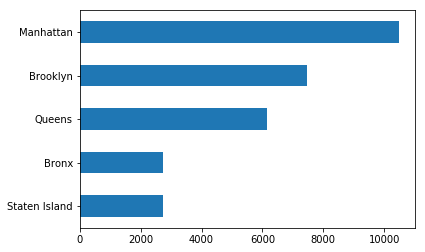

In [325]:
new_frames['borough'].value_counts().sort_values(ascending=True).plot(kind='barh')


**Which borough has the highest number of dogs per-capita?**

You’ll need to merge in `population_boro.csv`

In [476]:
per_capita = pd.read_csv("boro_population.csv", na_values=["NaN", "Unknown", "UNKNOWN", "unknown", "-999", "???"])

In [477]:
per_capita

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [478]:
populations = per_capita.groupby('borough')['population'].mean()
populations.sort_index()

borough
Bronx            1455444
Brooklyn         2636735
Manhattan        1644518
Queens           2339150
Staten Island     474558
Name: population, dtype: int64

In [479]:
dogs_per_capita = per_capita['borough'].value_counts()
dogs_per_capita.sort_index()

Bronx            1
Brooklyn         1
Manhattan        1
Queens           1
Staten Island    1
Name: borough, dtype: int64

In [483]:
numbers = dogs_per_capita / populations
numbers = numbers.sort_values(ascending=False)
numbers

Staten Island    2.107224e-06
Bronx            6.870756e-07
Manhattan        6.080809e-07
Queens           4.275057e-07
Brooklyn         3.792569e-07
dtype: float64

**Make a bar graph of the top 5 breeds in each borough.**

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

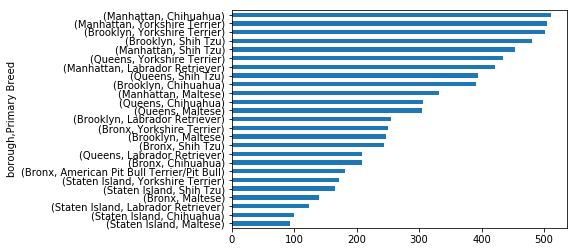

In [486]:
top_breeds = new_frames[new_frames['Primary Breed'] != 'Unknown']
top_breeds = top_breeds.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5)
top_breeds.sort_values(ascending = True).plot(kind='barh')

**What percentage of dogs are not guard dogs?**

In [487]:
new_frames['Guard or Trained'].value_counts(normalize=True)*100

No     99.918146
Yes     0.081854
Name: Guard or Trained, dtype: float64